In [1]:
# read the data and do K means over the partitions

In [2]:
import pandas, seaborn, os, numpy

import sklearn, sklearn.cluster
import scipy, scipy.stats

In [3]:
%matplotlib inline
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 9), 'axes.labelsize':20})

# 0. user-defined variables

In [4]:
#! drangajokull
home_dir = '/home/adrian/'

#! necio5
#home_dir = '/Users/adrian/'

In [5]:
full_wound_metabolic_file = '/home/adrian/gd15/hi/research/kerecis/data/clusters/df_logFC_comb_FULL.csv'
partial_wound_metabolic_file = '/home/adrian/gd15/hi/research/kerecis/data/clusters/df_logFC_comb_partial.csv'
scratch_dir = home_dir + 'scratch/'

In [6]:
days = [7, 14, 21, 28, 60]

# 1. read data

In [7]:
profiles = pandas.read_csv(full_wound_metabolic_file, index_col=0)

print(profiles.shape)
profiles.head()

(244, 5)


,logFC07,logFC14,logFC21,logFC28,logFC60
mz,,,,,
60.0452_pos,-0.083854,0.191472,0.982798,0.988894,0.743300
60.05658_pos,-0.038624,0.089157,0.781340,0.774211,0.811386
62.02452_pos,1.505635,1.319179,1.076527,1.081010,0.233993
71.02976_pos,1.279493,0.952287,0.857605,0.819389,0.030744
73.53242_pos,1.519172,1.332466,1.114554,1.120287,0.153851


In [8]:
a = profiles.max(axis=1).to_list()
b = profiles.min(axis=1).to_list()
for i in range(len(a)):
    diff = abs(a[i] - b[i])
    if diff < numpy.log2(1.75):
        print(a[i], b[i], diff)

0.6927274680700108 -0.0955987649792193 0.7883262330492301
0.9077684039123232 0.1552095236758309 0.7525588802364922
1.0617807185565136 0.2626839108393354 0.7990968077171782
0.7695048146110032 0.0361291555596226 0.7333756590513806
1.0684430155173696 0.2717063065333767 0.796736708983993
0.9794713586934152 0.2161151326975322 0.763356225995883
0.995913418258253 0.1890155595051411 0.8068978587531119
0.9941189557786302 0.1941583278954602 0.79996062788317
0.8977662505136887 0.1095673256993303 0.7881989248143585


In [9]:
zscore_profiles = pandas.DataFrame(scipy.stats.zscore(profiles, axis=1), index=profiles.index)

print(zscore_profiles.shape)
zscore_profiles.head()

(244, 5)


,logFC07,logFC14,logFC21,logFC28,logFC60
mz,,,,,
60.0452_pos,-1.490173,-0.857387,0.961330,0.975340,0.410889
60.05658_pos,-1.386680,-1.047310,0.791042,0.772108,0.870840
62.02452_pos,1.062214,0.633861,0.076405,0.086705,-1.859184
71.02976_pos,1.193809,0.399200,0.169268,0.076462,-1.838739
73.53242_pos,0.998931,0.603039,0.140981,0.153138,-1.896089


In [10]:
print(zscore_profiles.iloc[2, :])
print(numpy.mean(zscore_profiles.iloc[2, :]))
print(numpy.std(zscore_profiles.iloc[2, :]))

logFC07    1.062214
logFC14    0.633861
logFC21    0.076405
logFC28    0.086705
logFC60   -1.859184
Name: 62.02452_pos, dtype: float64
-2.6645352591003756e-16
1.0


# 2. visualization and formatting

In [11]:
print(zscore_profiles.max())
print(zscore_profiles.min())

logFC07    1.959745
logFC14    1.435840
logFC21    1.811548
logFC28    1.657814
logFC60    1.259948
dtype: float64
logFC07   -1.963852
logFC14   -1.393099
logFC21   -0.573176
logFC28   -1.074903
logFC60   -1.997137
dtype: float64


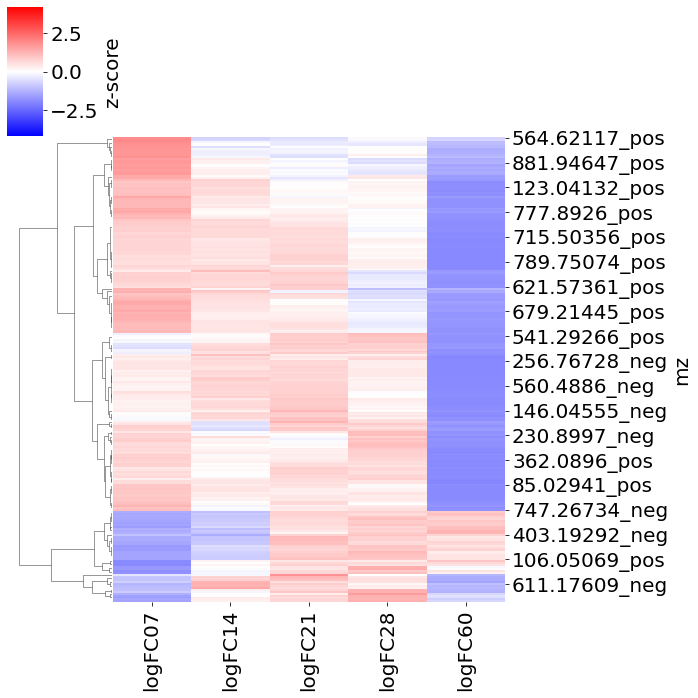

In [12]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.clustermap(zscore_profiles, cmap='bwr', vmin=-4.25, vmax=4.25, col_cluster=False, method=linkage_method, metric=distance_metric,  cbar_kws={'label':'z-score'})

In [13]:
x = zscore_profiles.to_numpy()
x

array([[-1.49017261, -0.85738675,  0.96132976,  0.97534024,  0.41088936],
       [-1.38668006, -1.04730988,  0.79104184,  0.77210809,  0.87084001],
       [ 1.06221391,  0.63386085,  0.07640512,  0.08670453, -1.8591844 ],
       ...,
       [ 0.64885422, -0.08319587,  0.66505973,  0.68318412, -1.91390221],
       [ 0.24492994,  0.62758681,  0.8596667 ,  0.20789327, -1.94007672],
       [ 0.52089942,  0.49519326,  0.68939048,  0.27726987, -1.98275304]])

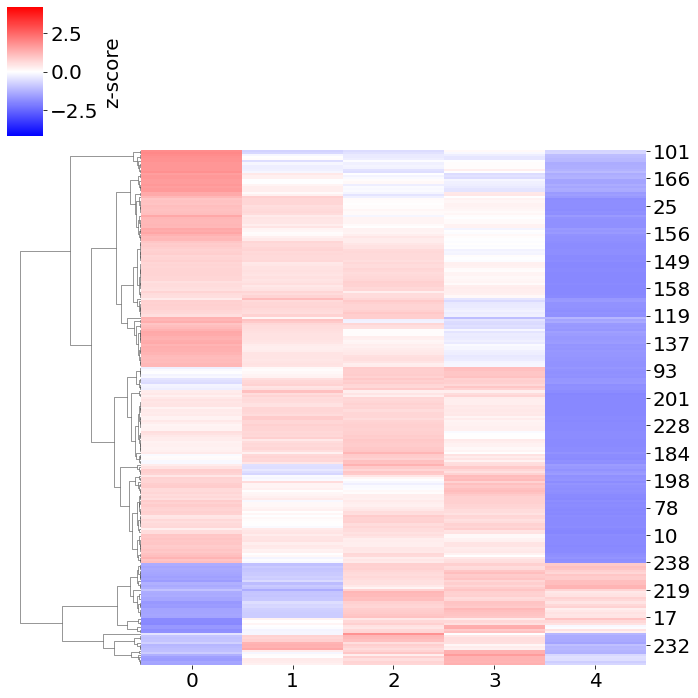

In [14]:
seaborn.clustermap(x, cmap='bwr', vmin=-4.25, vmax=4.25, col_cluster=False, method=linkage_method, metric=distance_metric,  cbar_kws={'label':'z-score'})

# 3. analysis

In [15]:
number_elements = zscore_profiles.shape[0]
print('number of elements {}'.format(number_elements))
fine = int(number_elements/5)
coarse = int(number_elements/20)
print(coarse, fine)
k_range = range(coarse, fine+1)

k_range = range(2, 12)

number of elements 244
12 48


2 0.8180859198848907 397.81037711640175 0.6263855489775245
3 0.7261404701804898 286.4079560992014 0.737510580063642
4 0.5559394109403958 244.5850814591597 0.718008193038016
5 0.4300963279272226 273.9526399461553 0.9587405907728886
6 0.42083067823562736 225.4429494472418 0.8672141552289604
7 0.4469677012306523 234.14922816328612 0.8657133084035291
8 0.449094297254103 221.79726253672996 0.782702843155281

Cluster c0 with 92 gene indices: [  2   3   4   5   6   7   8  16  18  25  27  30  32  33  40  47  48  50
  52  58  59  63  64  68  76  77  80  82  83  88  90 102 103 104 105 106
 107 108 110 111 112 113 114 117 118 119 120 122 123 124 125 126 127 128
 132 133 134 135 136 137 138 139 142 145 146 147 148 149 150 151 153 154
 155 156 158 159 160 161 162 163 164 165 166 181 195 197 203 204 215 226
 235 243]



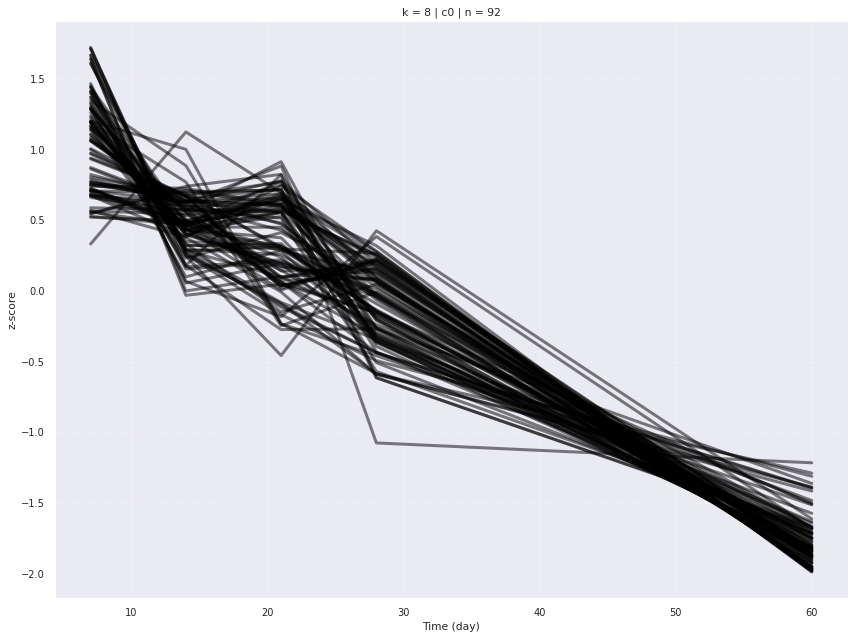


Cluster c1 with 47 gene indices: [  9  10  26  29  31  34  45  46  65  69  71  74  75  78  79  81  84 131
 144 174 176 182 183 185 189 190 193 196 198 199 205 206 209 211 212 213
 216 217 218 229 230 231 233 237 238 240 241]



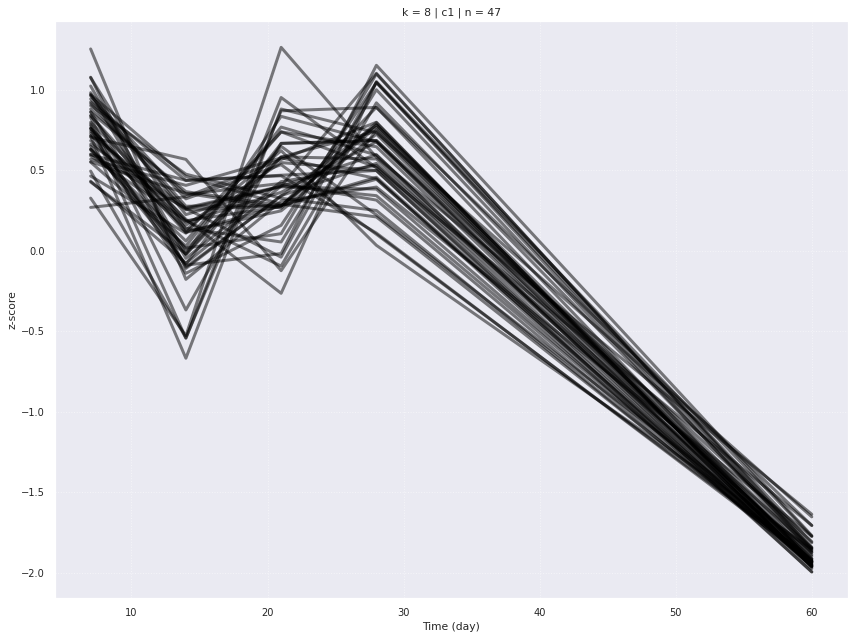


Cluster c2 with 33 gene indices: [  0   1  11  12  13  14  15  17  19  20  21  22  35  37  39  42  43  57
  72  73  85  86  87  92 175 186 187 188 191 192 210 219 225]



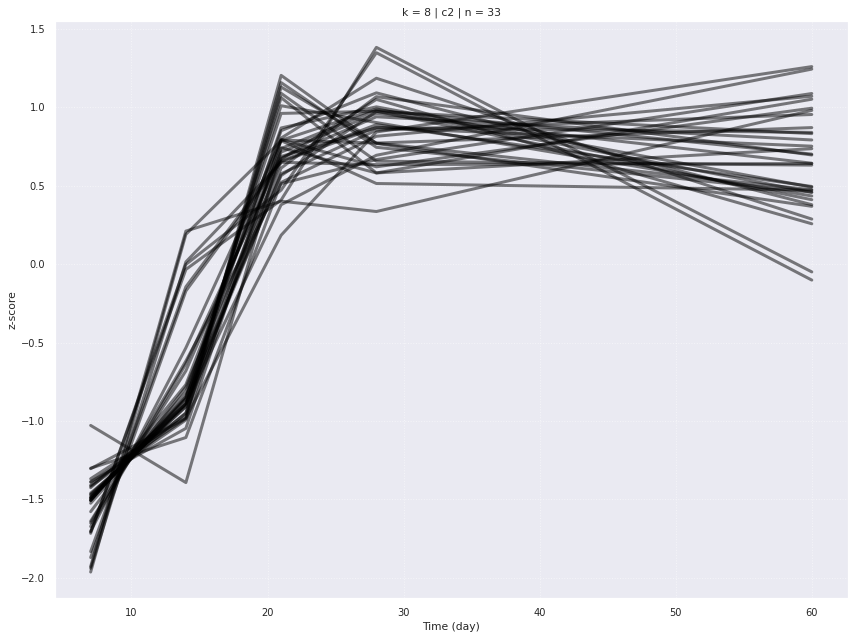


Cluster c3 with 11 gene indices: [ 49  97  98  99 100 101 129 130 140 141 143]



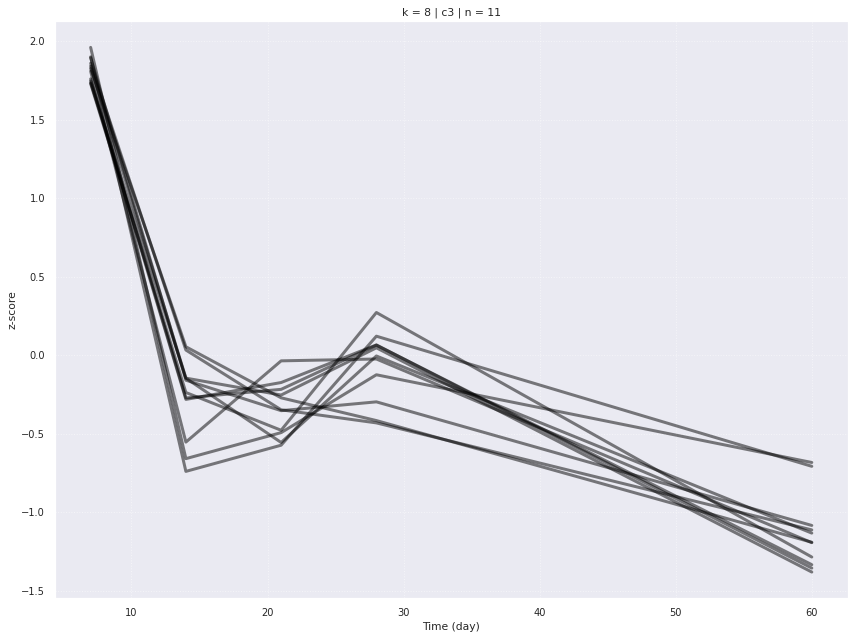


Cluster c4 with 7 gene indices: [116 167 168 169 177 180 208]



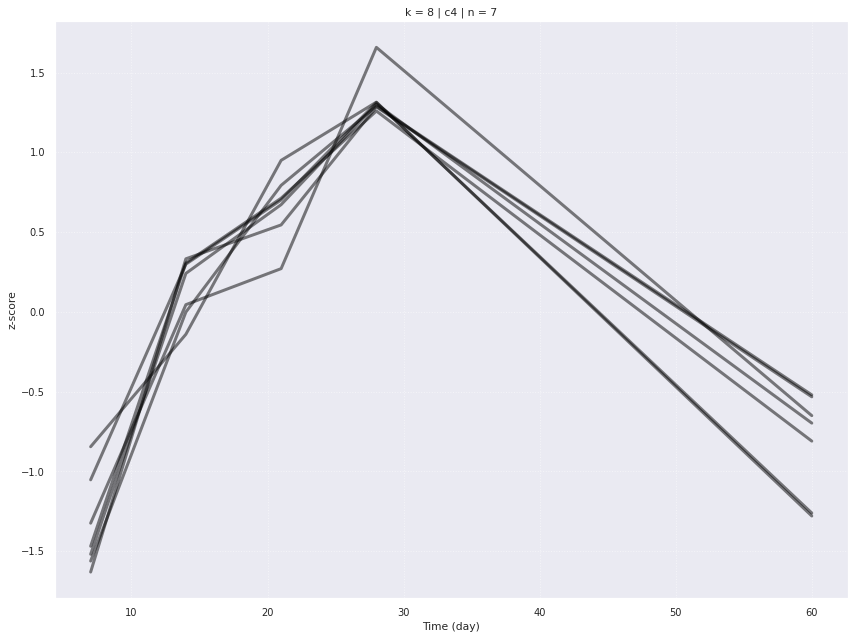


Cluster c5 with 1 gene indices: [56]



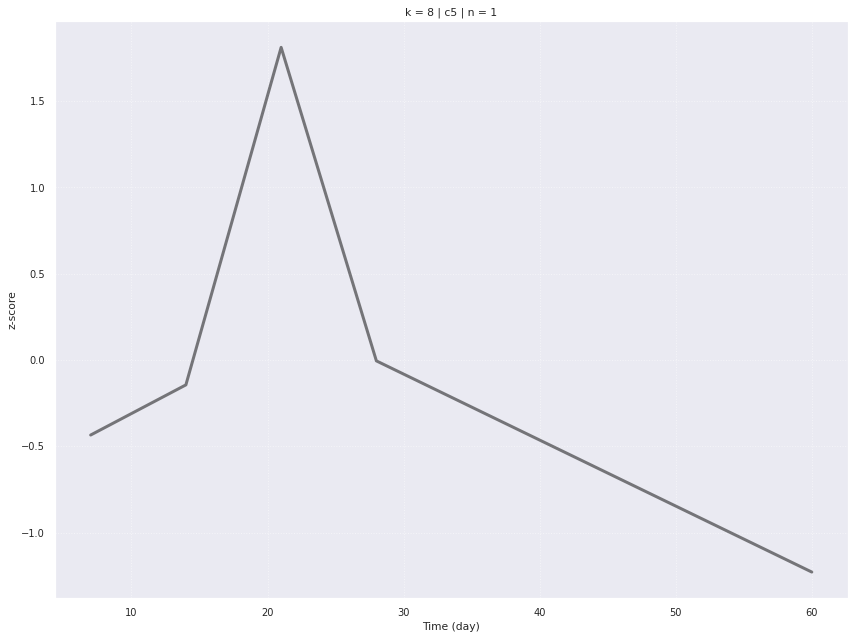


Cluster c6 with 46 gene indices: [ 23  24  36  38  41  44  53  54  60  61  62  66  67  70  89  91  93  94
  95  96 109 115 121 152 157 170 171 172 173 178 179 184 201 202 214 220
 221 222 223 224 227 228 234 236 239 242]



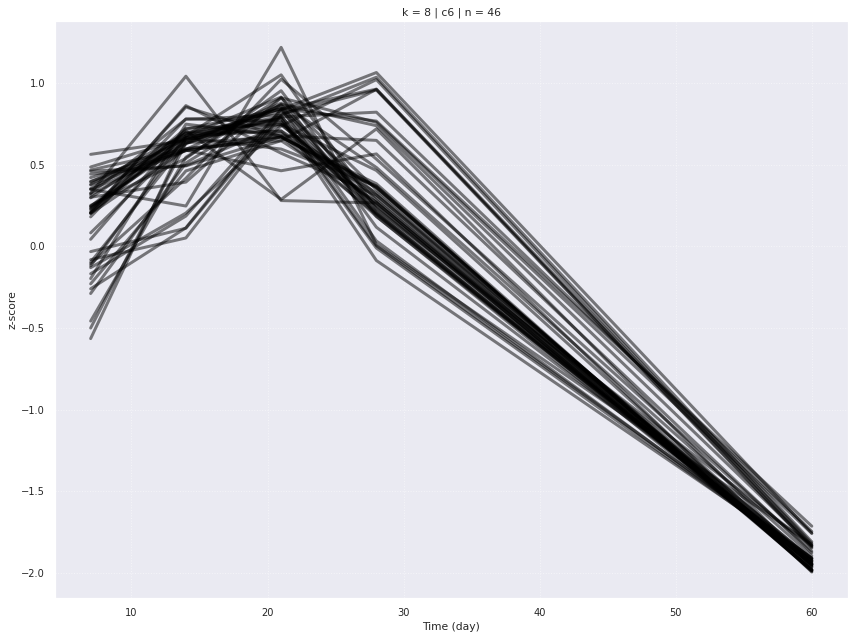


Cluster c7 with 7 gene indices: [ 28  51  55 194 200 207 232]



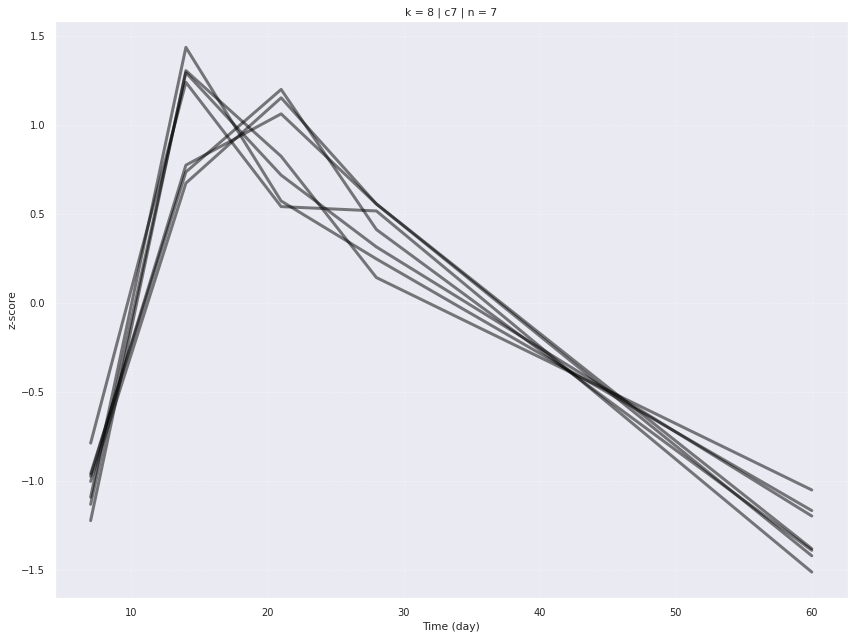

9 0.40995655051857904 224.78878118041388 0.8848452321007783
10 0.4002853191201779 220.70359566431603 0.9241553672635096
11 0.39988658181551573 212.07275448695296 0.9050944607598438


In [22]:
p_ss = []; p_khi = []; p_dbi = []; all_labels = []

for k in k_range:

    partition = sklearn.cluster.AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='complete').fit(x)
    labels = partition.labels_

    ss = sklearn.metrics.silhouette_score(x, labels, metric='cosine')
    khi = sklearn.metrics.calinski_harabasz_score(x, labels)
    dbi = sklearn.metrics.davies_bouldin_score(x, labels)

    print(k, ss, khi, dbi)
    
    p_ss.append(ss)
    p_khi.append(khi)
    p_dbi.append(dbi)
    all_labels.append(labels)
    
    if k == 8:
        
        colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
        
        for clusterID in range(k):
            indices = numpy.where(labels == clusterID)[0]
            print('\nCluster c{} with {} gene indices: {}\n'.format(clusterID, len(indices), indices))
            
            # plotting
            cluster = zscore_profiles.iloc[indices, :]
            for metabolite in cluster.index:
                matplotlib.pyplot.plot(days, cluster.loc[metabolite, :], '-', alpha=1/2, lw=3, color=colors[clusterID])
        
            matplotlib.pyplot.xlabel('Time (day)')
            matplotlib.pyplot.ylabel('z-score')
            matplotlib.pyplot.grid(alpha=0.5, ls=':')
            #matplotlib.pyplot.ylim([-4.25, 4.25])
            #matplotlib.pyplot.xlim(([6, 61]))
            matplotlib.pyplot.title('k = {} | c{} | n = {}'.format(k, clusterID, len(indices)))
            matplotlib.pyplot.tight_layout()
            matplotlib.pyplot.show()
        

# 4. plotting

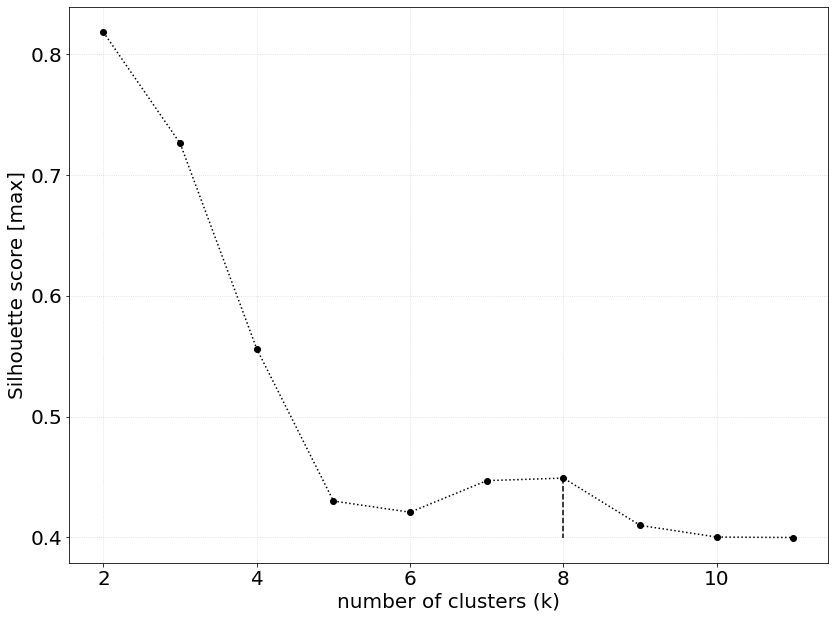

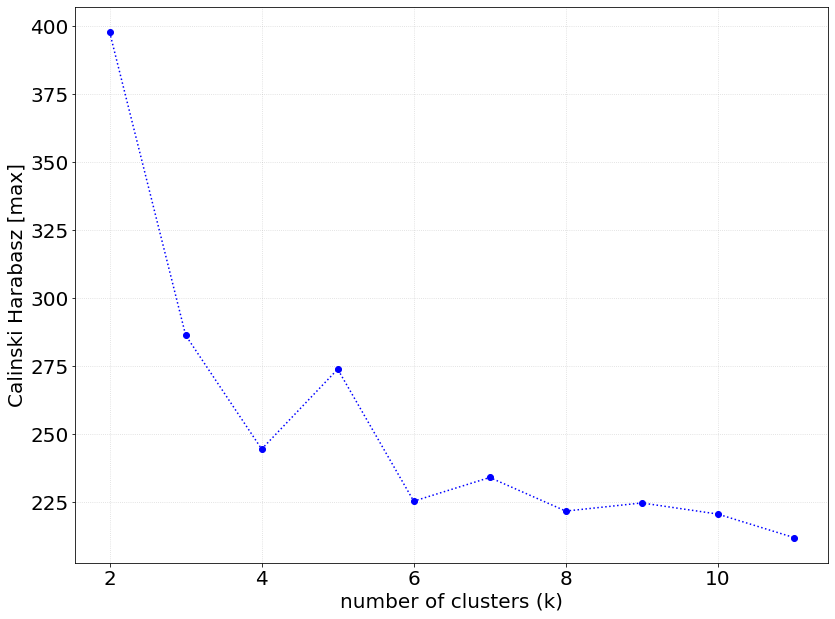

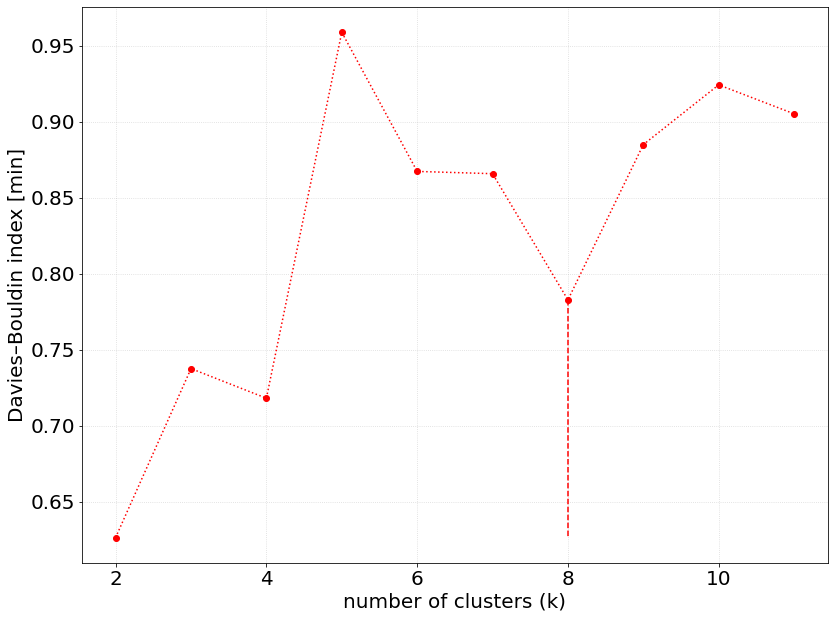

In [17]:
best_partition_index = 6

matplotlib.pyplot.plot(k_range, p_ss, 'ok')
matplotlib.pyplot.plot(k_range, p_ss, ':', color='black')
a = k_range[best_partition_index]
b = p_ss[best_partition_index]
c= numpy.min(p_ss)
matplotlib.pyplot.plot([a, a], [b, c], '--', color='black')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Silhouette score [max]')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

matplotlib.pyplot.plot(k_range, p_khi, 'ob')
matplotlib.pyplot.plot(k_range, p_khi, ':', color='blue')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Calinski Harabasz [max]')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

matplotlib.pyplot.plot(k_range, p_dbi, 'or')
matplotlib.pyplot.plot(k_range, p_dbi, ':', color='red')

a = k_range[best_partition_index]
b = p_dbi[best_partition_index]
c= numpy.min(p_dbi)
matplotlib.pyplot.plot([a, a], [b, c], '--', color='red')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Davies–Bouldin index [min]')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

## 4.1. heatmap

In [18]:
groupings = all_labels[best_partition_index]
groupings

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 6, 6, 0, 1, 0, 7, 1, 0, 1, 0, 0, 1, 2, 6, 2, 6, 2, 0, 6, 2, 2,
       6, 1, 1, 0, 0, 3, 0, 7, 0, 6, 6, 7, 5, 2, 0, 0, 6, 6, 6, 0, 0, 1,
       6, 6, 0, 1, 6, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2,
       0, 6, 0, 6, 2, 6, 6, 6, 6, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 0, 0, 0, 0, 6, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0,
       0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 6, 6, 6, 6, 1, 2,
       1, 4, 6, 6, 4, 0, 1, 1, 6, 1, 2, 2, 2, 1, 1, 2, 2, 1, 7, 0, 1, 0,
       1, 1, 7, 6, 6, 0, 0, 1, 1, 7, 4, 1, 2, 1, 1, 1, 6, 0, 1, 1, 1, 2,
       6, 6, 6, 6, 6, 2, 0, 6, 6, 1, 1, 1, 7, 1, 6, 0, 6, 1, 1, 6, 1, 1,
       6, 0])

In [19]:
zscore_profiles.max()

logFC07    1.959745
logFC14    1.435840
logFC21    1.811548
logFC28    1.657814
logFC60    1.259948
dtype: float64

8


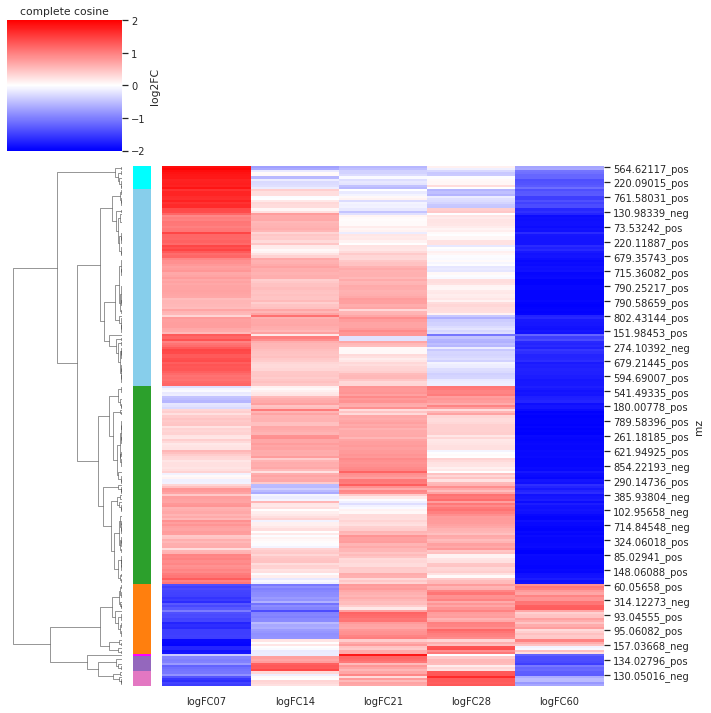

In [20]:
color_options = ['skyblue', 'tab:green', 'tab:orange', 'cyan', 'tab:pink', 'magenta', 'tab:green', 'tab:purple']
print(len(color_options))

k_colors = []
for i in range(len(zscore_profiles.index)):
  k_colors.append(color_options[groupings[i]])

# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'cosine'

# seaborn.set(font_scale=0.9)
# seaborn.clustermap(zscore_profiles, cmap='bwr', col_cluster=False, method=linkage_method, metric=distance_metric, cbar_kws={'label':'log2FC'}, row_colors=k_colors,vmin=-2, vmax=2)

# matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
# matplotlib.pyplot.tight_layout()
# #matplotlib.pyplot.savefig('/content/drive/MyDrive/hi/research/huvec/results/untargeted/heatmap.svg')